TODO: introducao 


TODO: descricao da base

| Feature                  | Descrição                        |
| ------------------------ | -------------------------------- |
| Pregnancies              | Número de gestações                |
| Glucose                  | Glicose: Concentração de glicose plasmática após 2 horas em um teste oral de tolerância à glicose         |
| BloodPressure            | Pressão Arterial: Pressão arterial diastólica (mm Hg)                |
| SkinThickness            | Espessura da Pele: Espessura da prega cutânea do tríceps (mm)      |
| Insulin                  | Insulina: Insulina sérica após 2 horas (µU/ml)                         |
| BMI                      | IMC: Índice de massa corporal (peso em kg/(altura em m)^2)       |
| DiabetesPedigreeFunction | Função da Linhagem Diabética: Função da linhagem diabética             |
| Age                      | Idade                            |
| Outcome                  | 0 = não diabético, 1 = diabético |

🎯 *Outcome* é a variável alvo. Ela indica se o indivídui tem (1) ou não (0) diabetes.


## Analise exploratória

rascunho... apagar depois
O que é esperado dessa etapa:
- Quantas linhas e colunas?
- O que cada feature representa?
- Qual é a variável alvo?

In [ ]:
# importacao das bibliotecas para tratamento dos dados
! pip install pandas matplotlib seaborn numpy

import pandas as pd # Para trabalhar com dados tabulares
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados

In [15]:
# opening the dataset
data = pd.read_csv('diabetes.csv')

# visualizando as 5 primeiras linhas do dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# verificando a quantidade de linhas e colunas
data.shape

(768, 9)

A base de dados possui 768 registros e com 8 variáveis.

Vamos verificar se os dadados estão balanceados, ou seja, se temos uma distribuição homogênia de registros positivos e negativos para Diabetes (Outcome 1 e 0, respectivamente)

Total de dados:  768
Total de não diabéticos:  500
Total de diabéticos:  268
Percentual de diabéticos na base:  35.0 %


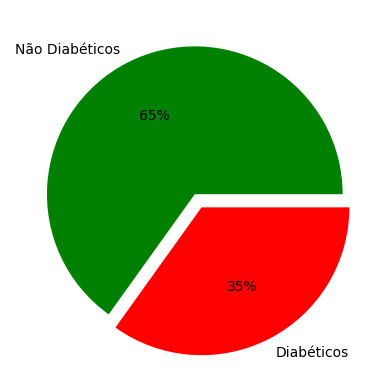

In [28]:
Total = len(data)
TotalNaoDiabetes = data['Outcome'].value_counts()[0] 
TotalDiabetes = data['Outcome'].value_counts()[1] 

Percentual_Diabetes = data['Outcome'].value_counts(normalize=True)[1]

print("Total de dados: ", Total)
print("Total de não diabéticos: ", TotalNaoDiabetes)
print("Total de diabéticos: ", TotalDiabetes)
print("Percentual de diabéticos na base: ", (round(Percentual_Diabetes, 2)*100), "%")

categororias = ["Não Diabéticos", "Diabéticos"]
plt.pie(data["Outcome"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()


In [18]:
# verificando o tipo de dado de cada coluna e a quantidade de valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
data.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Não há valores nulos nas variaáveis.

Com relação as estatísticas descritivas da base:

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Mesmo não havendo registros nulos percebe-se que existem valores zerados em variáveis que não fazem sentido (os marcadores fisiológicos). Podemos concluir que esses valores não foram fornecidos no momento da coleta das informações.


Vendo com mais detalhes a quantidade de registros que apresentam esse comportamento:

In [20]:
(data == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Todos as variáveis fisiológicas apresentam valores não fornecidos, com atenção especial para a Espessura da Dobra Cutânea e a Insulina.

Analisando a distribuição dos dados para observar a representatividade de cada cenário:

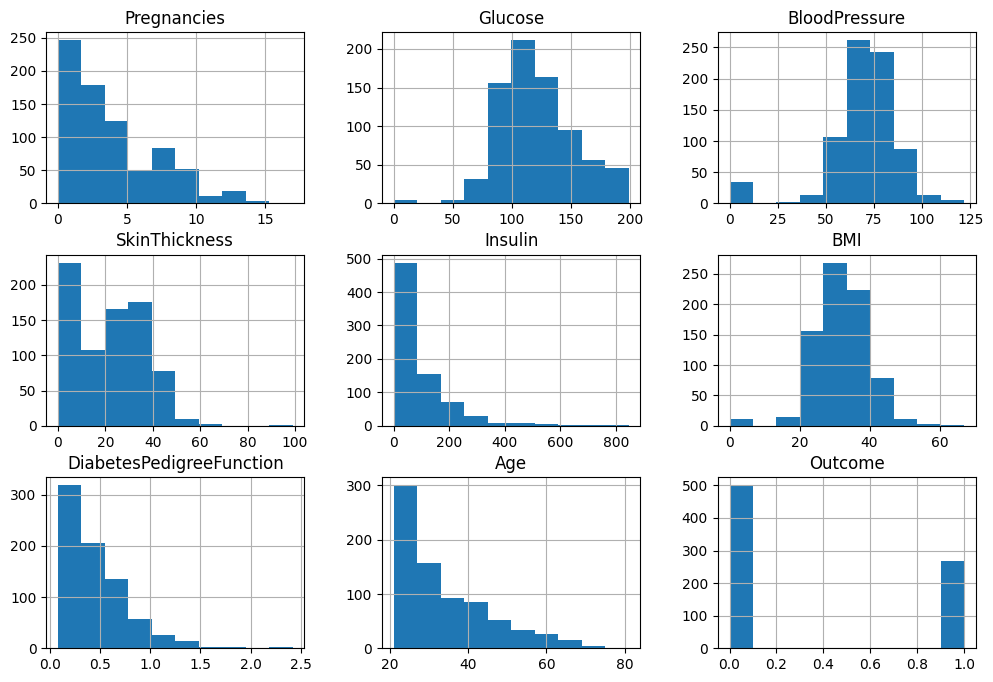

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

data.hist(figsize=(12, 8))
plt.show()

Pelos gráficos acima é possível verificar que não temos uma boa representatividade de casos com idades a partir dos 40 anos.

Analisando como essas variáveis impactam o alvo:


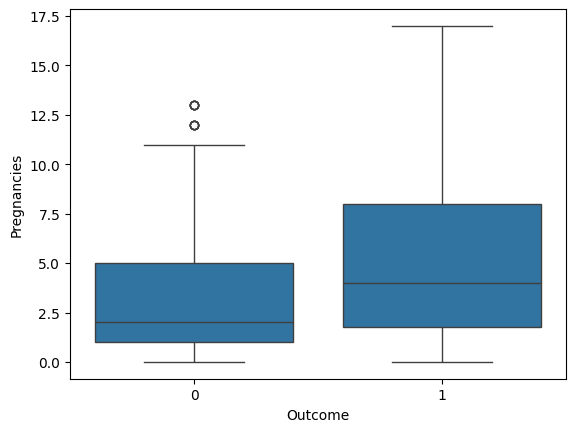

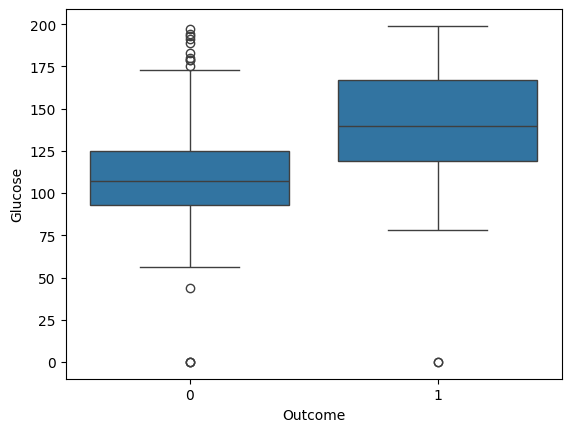

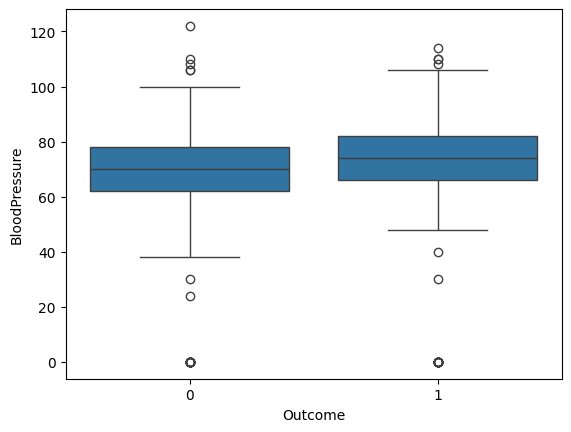

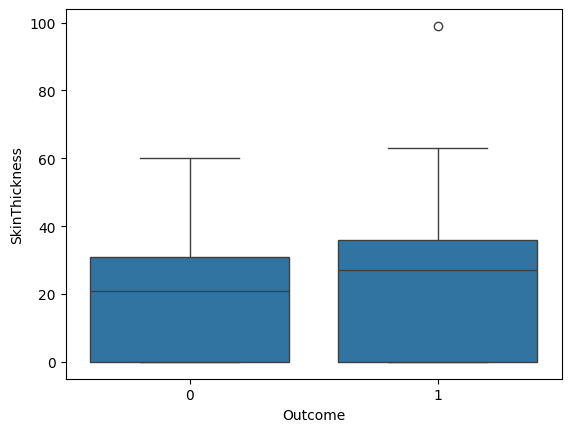

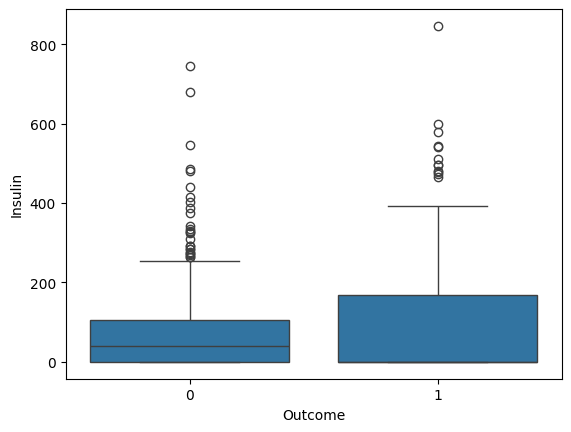

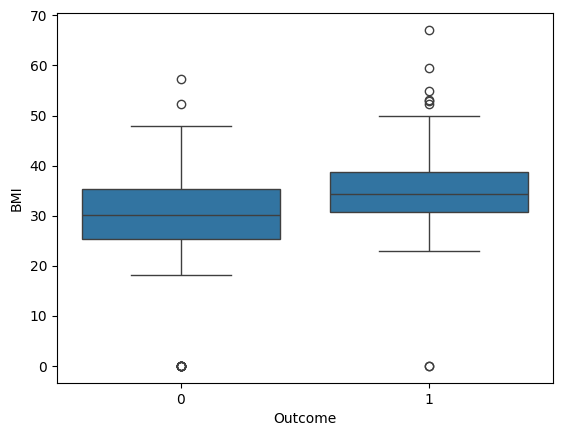

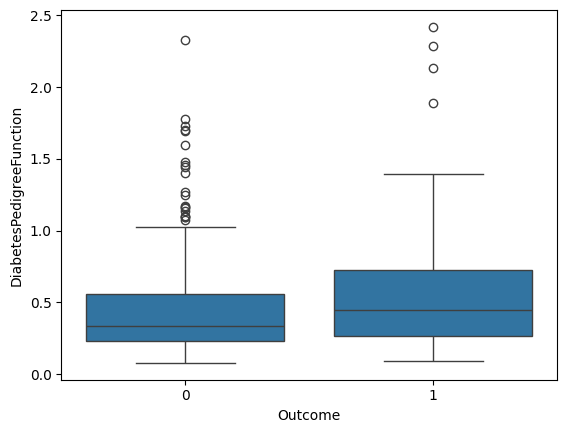

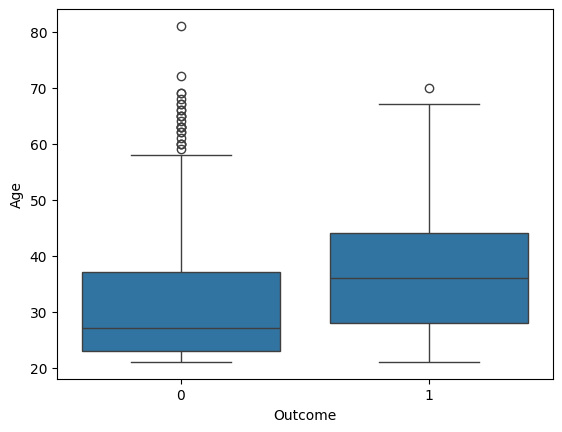

In [51]:
variaveis = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
for variavel in variaveis:
    sns.boxplot(x='Outcome', y=variavel, data=data)
    plt.show()

⭐️ Podemos verificar que a variável que mais impacta na classificação de diabéticos e não diabéticos é a variável Glucose, seguida pela variável BMI.


Agora correlacionando as variáveis entre si, temos:

<Axes: >

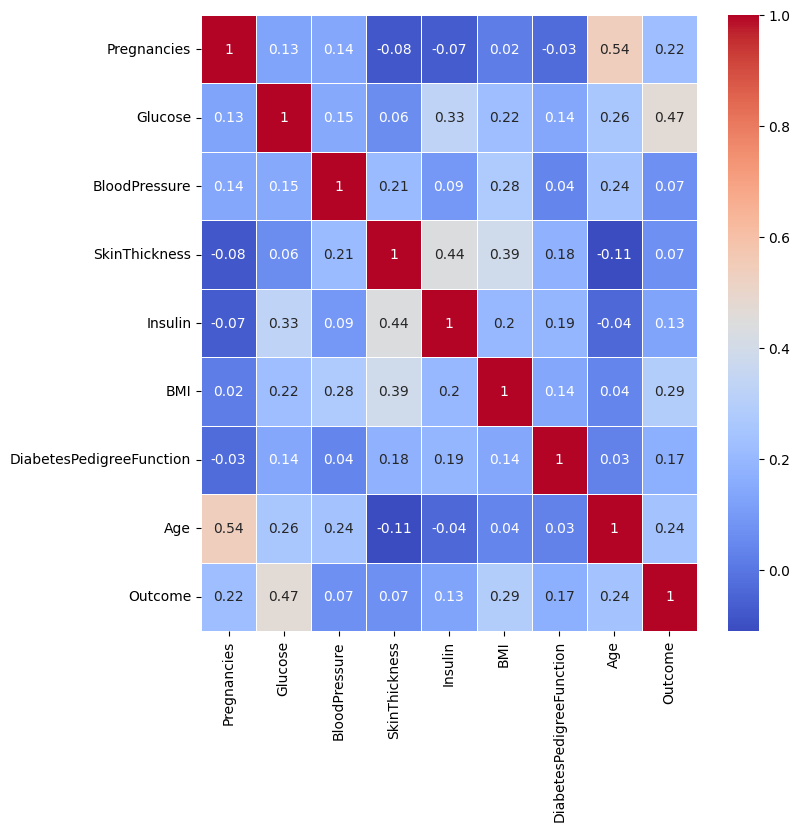

In [55]:
correlation_matrix = data.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap='coolwarm')


A análise do gráfico de correlação revela que não há correlações fortes entre as variáveis, predominando relações fracas e algumas moderadas. Isso indica que os atributos não apresentam dependência linear significativa entre si, o que reduz a ocorrência de multicolinearidade.